This notebook simulates the roboter

## Setup environment

In [1]:
close all;
clear all;
clc;

cd('../src');

## Load map

In [2]:
map = LoadMap('../Data/Vorgabe_update.png');

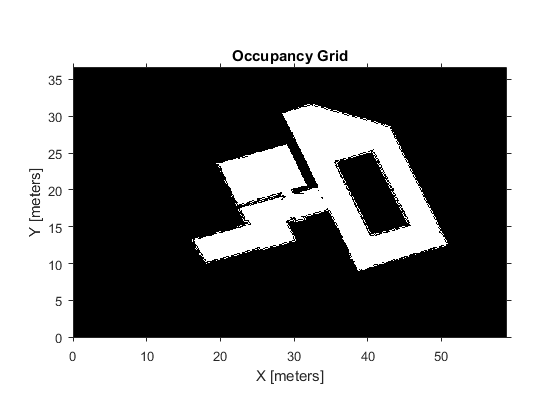

In [3]:
show(map);

##  Create trajectory

In [4]:
waypoints = [41 27;42 26; 47 17; 47 15; 46 14; 42 12; 40 13; 39 14; 33 24;33 27; 34 28;41 27];
t = 0:1:length(waypoints)-1;
l_t=numel(t);
angles = zeros(l_t,1);  %Richtungswinkel

% Calculate Angle
for i=1:l_t
    if i == l_t
        angles(i) = angles(i-1) + 0.002;
        waypoints(i, 3) = waypoints(i - 1, 3) + 0.002;
    else
        angles(i) = atan2(waypoints(i + 1, 2) - waypoints(i, 2), waypoints(i + 1, 1) - waypoints(i, 1));
        waypoints(i, 3) = atan2(waypoints(i + 1, 2) - waypoints(i, 2), waypoints(i + 1, 1) - waypoints(i, 1));
    end
end

### Interpolate trajrctory

Equidistant interpolation

In [5]:
stepLengths   = sqrt(sum(diff(waypoints, [], 1) .^ 2, 2));
stepLengths   = [0; stepLengths]; % add the starting point
cumulativeLen = cumsum(stepLengths);
finalStepLocs = linspace(0,cumulativeLen(end), 100);
finalPathXY   = interp1(cumulativeLen, waypoints, finalStepLocs);

## Simulate

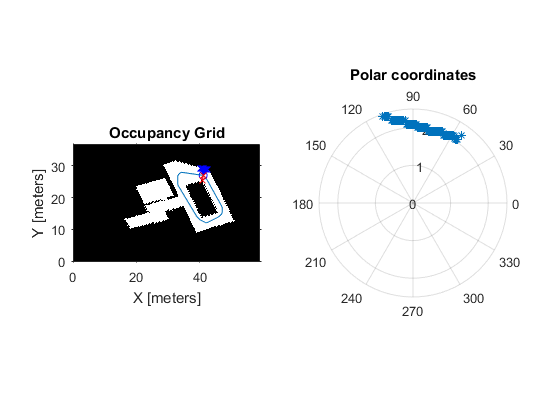

In [6]:
maxrange = 5;

for j = 1 : length(finalPathXY)
   figure(1);
   subplot(1, 2, 1);
   show(map)
   hold on
   
%    robotPose       = [xq(j), yq(j), aq(j)];
   robotPose(1) = finalPathXY(j, 1);
   robotPose(2) = finalPathXY(j, 2);
   robotPose(3) = finalPathXY(j, 3);
   
   if ~isnan(robotPose(1)) || ~isnan(robotPose(2)) || ~isnan(robotPose(3))
       [thetas, rhos, xs, ys] = SimulateKinect(map, robotPose(1), robotPose(2), robotPose(3));
       direction       = rayIntersection(map, robotPose, -pi/2, 30);   %direction

       plot(robotPose(1), robotPose(2), 'ob'); % Robot pose

       for i = 1:size(xs)
            plot([robotPose(1), xs(i)],...
                [robotPose(2), ys(i)], '-bx') % Plot intersecting rays
       end

       plot(finalPathXY(: , 1), finalPathXY(:, 2));
       plot([robotPose(1), direction(1, 1)],...
                [robotPose(2), direction(1, 2)], '-rx') % Plot direction

        hold off
        
        subplot(1, 2, 2);
        polarplot(thetas, rhos, '*');
        title('Polar coordinates');
        
        F(j) = getframe(gcf);
        drawnow
    else
        robotPose       
    end
end

## Store as video

### Create the video writer with 1 fps

In [7]:
writerObj = VideoWriter('../myVideo.mp4', 'MPEG-4');
writerObj.FrameRate = 3; % sets the seconds per image

### Open the video writer

In [8]:
open(writerObj);
for i = 1 : length(F)
    writeVideo(writerObj, F(i));
end
close(writerObj);

<video controls src="../myVideo.mp4" />